In [1]:
import os
os.environ["http_proxy"] = "http://127.0.0.1:8889"
os.environ["https_proxy"] = "http://127.0.0.1:8889"

In [2]:
from transformers.pipelines import SUPPORTED_TASKS

/home/dean/miniconda3/envs/llm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
for (k, v) in SUPPORTED_TASKS.items():
    print(k, v)

audio-classification {'impl': <class 'transformers.pipelines.audio_classification.AudioClassificationPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForAudioClassification'>,), 'default': {'model': {'pt': ('superb/wav2vec2-base-superb-ks', '372e048')}}, 'type': 'audio'}
automatic-speech-recognition {'impl': <class 'transformers.pipelines.automatic_speech_recognition.AutomaticSpeechRecognitionPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForCTC'>, <class 'transformers.models.auto.modeling_auto.AutoModelForSpeechSeq2Seq'>), 'default': {'model': {'pt': ('facebook/wav2vec2-base-960h', '55bb623')}}, 'type': 'multimodal'}
text-to-audio {'impl': <class 'transformers.pipelines.text_to_audio.TextToAudioPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForTextToWaveform'>, <class 'transformers.models.auto.modeling_auto.AutoModelForTextToSpectrogram'>), 'default': {'model': {'pt': ('suno

In [4]:
from transformers import *

/home/dean/miniconda3/envs/llm/lib/python3.11/site-packages/transformers/deepspeed.py:23: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(
/home/dean/miniconda3/envs/llm/lib/python3.11/site-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
Loading custom CUDA kernels...
Loading custom CUDA kernels...
Using /home/dean/.cache/torch_extensions/py311_cu121 as PyTorch extensions root...
Detected CUDA files, patching ldflags
Emitting ninja build file /home/dean/.cache/torch_extensions/py311_cu121/cuda_kernel/build.ninja...
Building extension module cuda_kernel...
Allowing ninja to set a default number of workers... (overridable by setting the

ninja: no work to do.


In [5]:
infos = SUPPORTED_TASKS["text-classification"]
infos

{'impl': transformers.pipelines.text_classification.TextClassificationPipeline,
 'tf': (),
 'pt': (transformers.models.auto.modeling_auto.AutoModelForSequenceClassification,),
 'default': {'model': {'pt': ('distilbert-base-uncased-finetuned-sst-2-english',
    'af0f99b'),
   'tf': ('distilbert-base-uncased-finetuned-sst-2-english', 'af0f99b')}},
 'type': 'text'}

In [6]:
pipe = pipeline("text-classification")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
loading configuration file config.json from cache at /home/dean/.cache/huggingface/hub/models--distilbert-base-uncased-finetuned-sst-2-english/snapshots/4643665f84c6760e3cbf6adaace6c398592270af/config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased-finetuned-sst-2-english",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "finetuning_task": "sst-2",
  "hidden_dim": 3072,
  "id2label": {
    "0": "NEGATIVE",
    "1": "POSITIVE"
  },
  "initializer_range": 0.02,
  "label2id": {
    "NEGATIVE": 0,
    "POSITIVE": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",


In [7]:
pipe("I love you")

[{'label': 'POSITIVE', 'score': 0.9998656511306763}]

## Specify the task type and the model

In [8]:
pipe = pipeline("text-classification", model="uer/roberta-base-finetuned-dianping-chinese")

loading configuration file config.json from cache at /home/dean/.cache/huggingface/hub/models--uer--roberta-base-finetuned-dianping-chinese/snapshots/25faf1874b21e76db31ea9c396ccf2a0322e0071/config.json
Model config BertConfig {
  "_name_or_path": "uer/roberta-base-finetuned-dianping-chinese",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "negative (stars 1, 2 and 3)",
    "1": "positive (stars 4 and 5)"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative (stars 1, 2 and 3)": 0,
    "positive (stars 4 and 5)": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.34.1",
  "type_voc

In [9]:
pipe("我觉得不太行")

[{'label': 'negative (stars 1, 2 and 3)', 'score': 0.9743660688400269}]

## pre-load the model and the tokenizer

In [10]:
model = AutoModelForSequenceClassification.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")
tokenizer = AutoTokenizer.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")


loading configuration file config.json from cache at /home/dean/.cache/huggingface/hub/models--uer--roberta-base-finetuned-dianping-chinese/snapshots/25faf1874b21e76db31ea9c396ccf2a0322e0071/config.json
Model config BertConfig {
  "_name_or_path": "uer/roberta-base-finetuned-dianping-chinese",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "negative (stars 1, 2 and 3)",
    "1": "positive (stars 4 and 5)"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative (stars 1, 2 and 3)": 0,
    "positive (stars 4 and 5)": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.34.1",
  "type_voc

In [11]:
pipe = pipeline("text-classification", model=model, tokenizer=tokenizer)
pipe("我觉得不太行")

[{'label': 'negative (stars 1, 2 and 3)', 'score': 0.9743660688400269}]

In [12]:
pipe.model.device

device(type='cpu')

In [13]:
import torch
import time
times = []
for i in range(100):
    torch.cuda.synchronize()
    start = time.time()
    pipe("我觉得不太行")
    torch.cuda.synchronize()
    end = time.time()  
    times.append(end - start)
print(sum(times) / len(times))

0.020633153915405274


## Use GPU

In [14]:
pipe = pipeline("text-classification", model=model, tokenizer=tokenizer, device=0)

In [15]:
pipe.model.device

device(type='cuda', index=0)

In [16]:
times = []
for i in range(100):
    torch.cuda.synchronize()
    start = time.time()
    pipe("我觉得不太行")
    torch.cuda.synchronize()
    end = time.time()  
    times.append(end - start)
print(sum(times) / len(times))

/home/dean/miniconda3/envs/llm/lib/python3.11/site-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


0.015445261001586915


## Find the parameters of the pipeline

In [17]:
qa_pipe = pipeline('question-answering', model='uer/roberta-base-chinese-extractive-qa')

loading configuration file config.json from cache at /home/dean/.cache/huggingface/hub/models--uer--roberta-base-chinese-extractive-qa/snapshots/9b02143727b9c4655d18b43a69fc39d5eb3ddd53/config.json
Model config BertConfig {
  "_name_or_path": "uer/roberta-base-chinese-extractive-qa",
  "architectures": [
    "BertForQuestionAnswering"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.34.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 21128
}

loading configuration file config.json from cache at /home/dean/.cache/huggingface/hub/models--uer--roberta-bas

In [18]:
qa_pipe

In [19]:
# use cmd key + click to see the usage
QuestionAnsweringPipeline


transformers.pipelines.question_answering.QuestionAnsweringPipeline

    ```python
    >>> from transformers import pipeline

    >>> oracle = pipeline(model="deepset/roberta-base-squad2")
    >>> oracle(question="Where do I live?", context="My name is Wolfgang and I live in Berlin")
    {'score': 0.9191, 'start': 34, 'end': 40, 'answer': 'Berlin'}
    ```

In [20]:
qa_pipe(question="中国的首都是哪里", context="中国的首都是北京", max_answer_len=2)   

Disabling tokenizer parallelism, we're using DataLoader multithreading already


{'score': 0.6598960161209106, 'start': 6, 'end': 8, 'answer': '北京'}

## Other pipeline example

In [21]:
checkpoint = "google/owlvit-base-patch32"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

loading configuration file config.json from cache at /home/dean/.cache/huggingface/hub/models--google--owlvit-base-patch32/snapshots/8ca8ee912aa922a57e6a89144189080ebc8e852e/config.json
text_config is None. Initializing the OwlViTTextConfig with default values.
vision_config is None. initializing the OwlViTVisionConfig with default values.
Model config OwlViTConfig {
  "_name_or_path": "google/owlvit-base-patch32",
  "architectures": [
    "OwlViTForObjectDetection"
  ],
  "initializer_factor": 1.0,
  "logit_scale_init_value": 2.6592,
  "model_type": "owlvit",
  "projection_dim": 512,
  "text_config": {
    "bos_token_id": 0,
    "dropout": 0.0,
    "eos_token_id": 2,
    "max_length": 16,
    "model_type": "owlvit_text_model",
    "pad_token_id": 1
  },
  "text_config_dict": null,
  "torch_dtype": "float32",
  "transformers_version": "4.34.1",
  "vision_config": {
    "dropout": 0.0,
    "model_type": "owlvit_vision_model"
  },
  "vision_config_dict": null
}

loading configuration fil

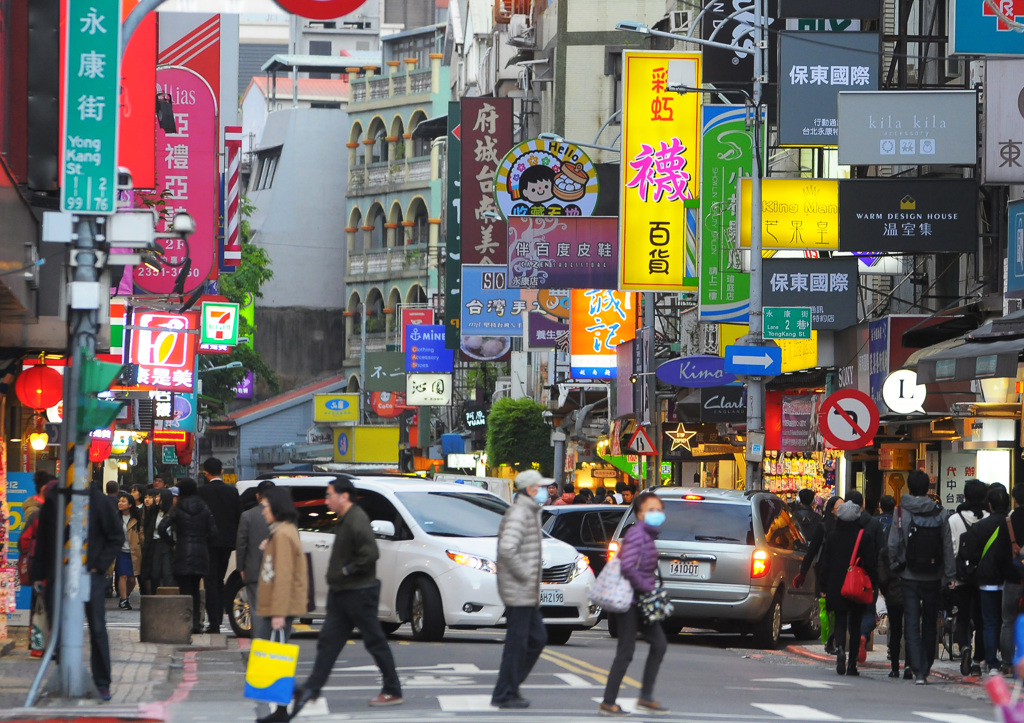

In [34]:
import requests
from PIL import Image

url = "https://images.chinatimes.com/newsphoto/2022-08-27/1024/20220827001276.jpg"
im = Image.open(requests.get(url, stream=True).raw)
im

In [35]:
predictions = detector(
    im,
    candidate_labels=["car"],
)

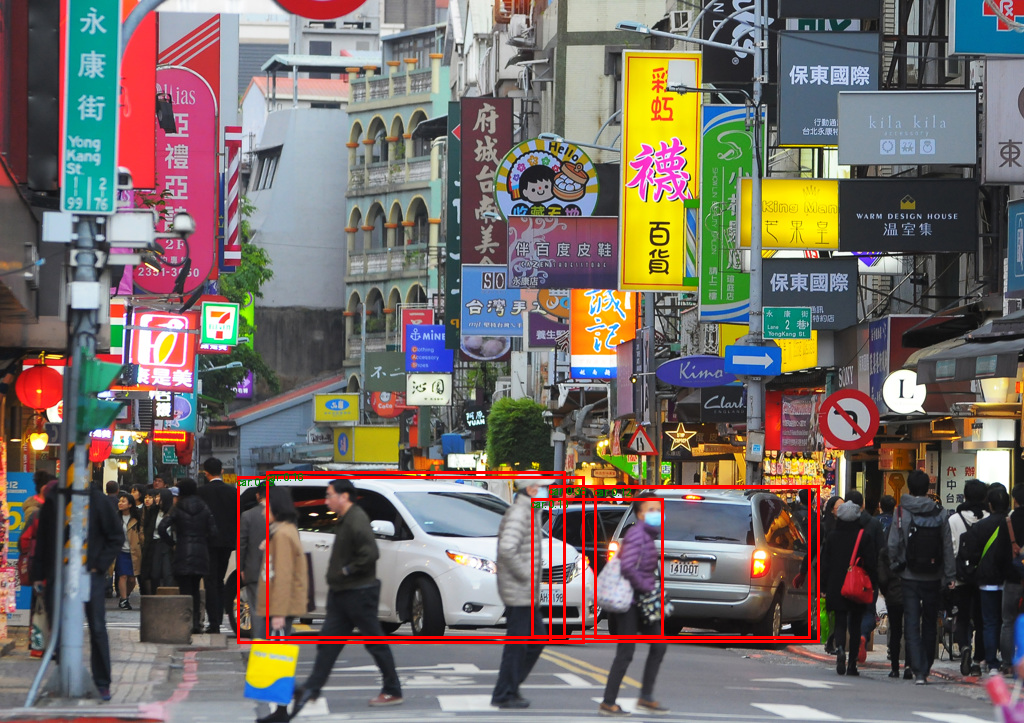

In [38]:
from PIL import ImageDraw

draw = ImageDraw.Draw(im)

for pred in predictions:
    box = pred["box"]
    label = pred["label"]
    score = pred["score"]
    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=3)
    draw.text((xmin, ymin), f"{label}: {round(score, 2)}", fill="green")
    
im